# Tugas Besar Probabilitas dan Statistika

## Inisialisasi

In [3]:
import pandas as pd
from scipy import stats
from scipy.stats import t
import statistics
import math

In [4]:
df = pd.read_csv('dataset/phone.csv')
dataArray = df.to_numpy()

In [5]:
batteryArray = []
clockSpeedArray = []
ramArray = []
nCoresArray = []
useTimeArray = []
widthArray = []
heightArray = []
brandArray = []
fivegArray = []
gradeArray = []
priceArray = []

for data in dataArray:
    batteryArray.append(data[1])
    clockSpeedArray.append(data[2])
    ramArray.append(data[3])
    nCoresArray.append(data[4])
    useTimeArray.append(data[5])
    widthArray.append(data[6])
    heightArray.append(data[7])
    brandArray.append(data[8])
    fivegArray.append(data[9])
    gradeArray.append(data[10])
    priceArray.append(data[11])

## General Questions
1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?


### Removing Outliers

Dalam menentukan outliers, kita bisa menggunakan bantuan visualisasi dari box plot. Pada box plot, outliers adalah data dengan nilai x yang tidak memenuhi range
$ (Q1 - 1.5 * IQR) < x < (Q3 + 1.5 * IQR) $. Outliers ditandai dengan bulat hitam

<Axes: title={'center': 'Battery Power'}>

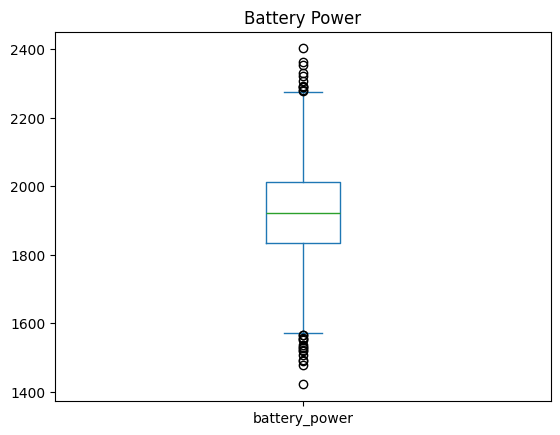

In [6]:
df['battery_power'].plot(kind='box', title="Battery Power")

<Axes: title={'center': 'Clock Speed'}>

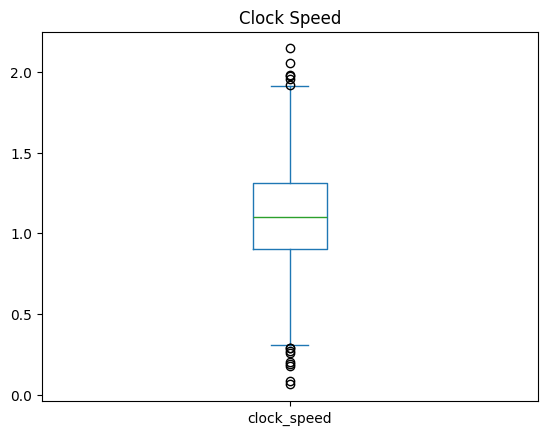

In [7]:
df['clock_speed'].plot(kind='box', title="Clock Speed")

<Axes: title={'center': 'RAM'}>

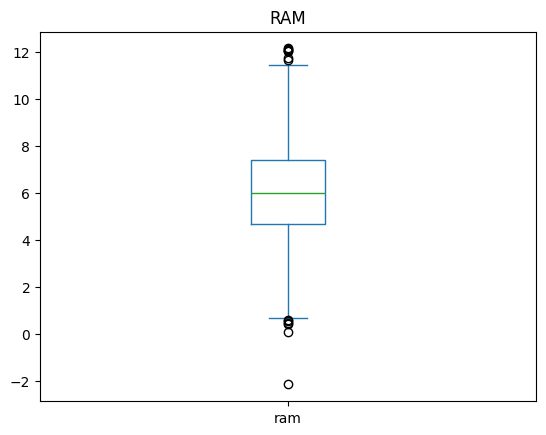

In [8]:
df['ram'].plot(kind='box', title="RAM")

<Axes: title={'center': 'Number of Cores'}>

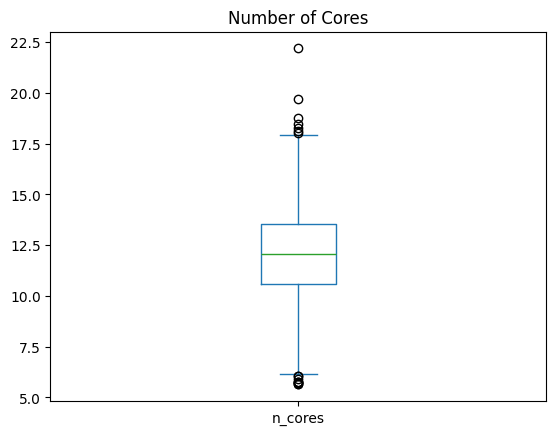

In [9]:
df['n_cores'].plot(kind='box', title="Number of Cores")

<Axes: title={'center': 'Use Time'}>

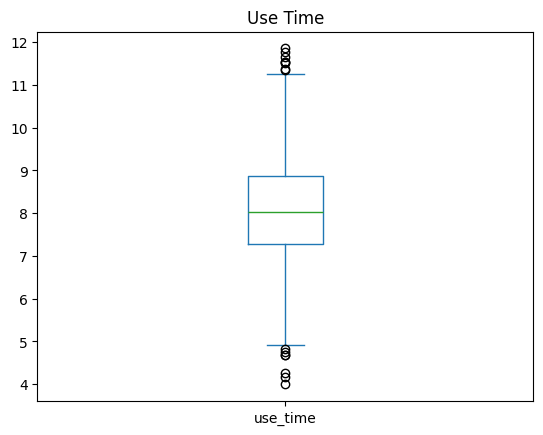

In [10]:
df['use_time'].plot(kind='box', title="Use Time")

<Axes: title={'center': 'Width (pixels)'}>

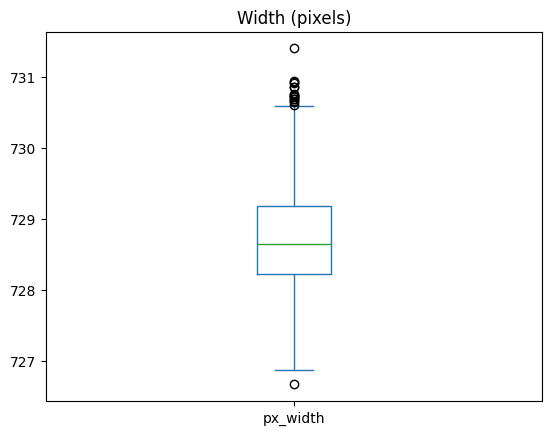

In [11]:
df['px_width'].plot(kind='box', title="Width (pixels)")

<Axes: title={'center': 'Height (pixels)'}>

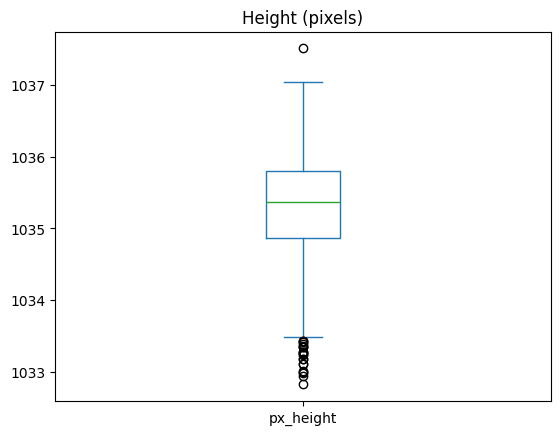

In [12]:
df['px_height'].plot(kind='box', title="Height (pixels)")

<Axes: title={'center': '5G Bandwidth'}>

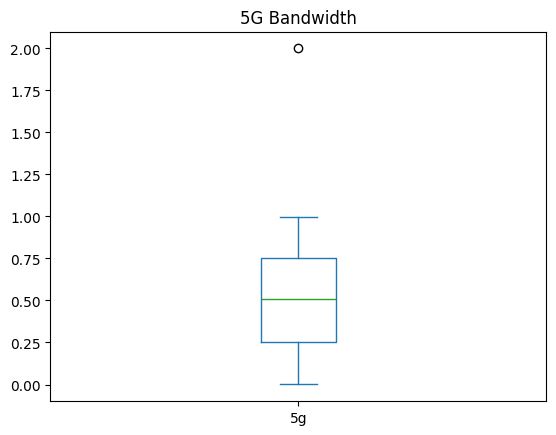

In [13]:
df['5g'].plot(kind='box', title="5G Bandwidth")

<Axes: title={'center': 'Price'}>

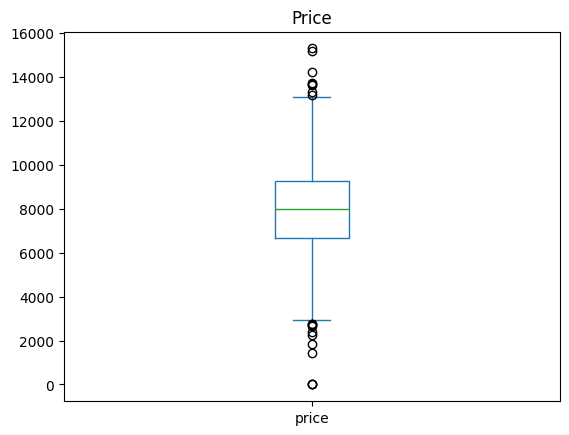

In [14]:
df['price'].plot(kind='box', title="Price")

In [15]:
# Helper function to calculate IQR and bounds
def calculate_bounds(array):
    array.sort()
    q1 = round(0.25 * (len(array) + 1)) - 1
    q3 = round(0.75 * (len(array) + 1)) - 1
    iqr = array[q3] - array[q1]
    print(f"Q1: {array[q1]}")
    print(f"Q3: {array[q3]}")
    print(f"IQR: {iqr}")
    lower_bound = array[q1] - 1.5 * iqr
    upper_bound = array[q3] + 1.5 * iqr
    return lower_bound, upper_bound

In [16]:
# Calculate bounds for each array
print("Battery Power")
bounds_bat = calculate_bounds(batteryArray)
print("\nClock Speed")
bounds_clock = calculate_bounds(clockSpeedArray)
print("\nRAM")
bounds_ram = calculate_bounds(ramArray)
print("\n# of Cores")
bounds_ncore = calculate_bounds(nCoresArray)
print("\nUse Time")
bounds_usetime = calculate_bounds(useTimeArray)
print("\nWidth")
bounds_width = calculate_bounds(widthArray)
print("\nHeight")
bounds_height = calculate_bounds(heightArray)
print("\n5G Bandwidth")
bounds_5g = calculate_bounds(fivegArray)
print("\nPrice")
bounds_price = calculate_bounds(priceArray)

# Create masks for each array
mask_bat = (df['battery_power'] >= bounds_bat[0]) & (df['battery_power'] <= bounds_bat[1])
mask_clock = (df['clock_speed'] >= bounds_clock[0]) & (df['clock_speed'] <= bounds_clock[1])
mask_ram = (df['ram'] >= bounds_ram[0]) & (df['ram'] <= bounds_ram[1])
mask_ncore = (df['n_cores'] >= bounds_ncore[0]) & (df['n_cores'] <= bounds_ncore[1])
mask_usetime = (df['use_time'] >= bounds_usetime[0]) & (df['use_time'] <= bounds_usetime[1])
mask_width = (df['px_width'] >= bounds_width[0]) & (df['px_width'] <= bounds_width[1])
mask_height = (df['px_height'] >= bounds_height[0]) & (df['px_height'] <= bounds_height[1])
mask_brand = (df['brand'] != "undefined")
mask_5g = (df['5g'] >= bounds_5g[0]) & (df['5g'] <= bounds_5g[1])
mask_price = (df['price'] >= bounds_price[0]) & (df['price'] <= bounds_price[1])

# Combine masks
final_mask = mask_bat & mask_clock & mask_ram & mask_ncore & mask_usetime & mask_width & mask_brand & mask_height & mask_5g & mask_price

# Filter DataFrame
df_filtered = df[final_mask]

Battery Power
Q1: 1833.8684847384684
Q3: 2011.328071457394
IQR: 177.4595867189255

Clock Speed
Q1: 0.902701814029262
Q3: 1.3091332476167523
IQR: 0.40643143358749034

RAM
Q1: 4.689465716165617
Q3: 7.416067158135769
IQR: 2.7266014419701525

# of Cores
Q1: 10.5564876455369
Q3: 13.543508639622672
IQR: 2.987020994085773

Use Time
Q1: 7.278577914082928
Q3: 8.872259429695514
IQR: 1.5936815156125865

Width
Q1: 728.2284941364907
Q3: 729.1774660487883
IQR: 0.9489719122976794

Height
Q1: 1034.860955029187
Q3: 1035.7929374790829
IQR: 0.9319824498959406

5G Bandwidth
Q1: 0.2557624819074696
Q3: 0.7568483317625406
IQR: 0.501085849855071

Price
Q1: 6650.555712238094
Q3: 9250.347193985735
IQR: 2599.7914817476412


### Re-initialize arrays with filtered data

In [17]:
dataFiltered = df_filtered.to_numpy()

batteryArray.clear()
clockSpeedArray.clear()
ramArray.clear()
nCoresArray.clear()
useTimeArray.clear()
widthArray.clear()
heightArray.clear()
brandArray.clear()
fivegArray.clear()
gradeArray.clear()
priceArray.clear()

for data in dataFiltered:
    batteryArray.append(data[1])
    clockSpeedArray.append(data[2])
    ramArray.append(data[3])
    nCoresArray.append(data[4])
    useTimeArray.append(data[5])
    widthArray.append(data[6])
    heightArray.append(data[7])
    brandArray.append(data[8])
    fivegArray.append(data[9])
    gradeArray.append(data[10])
    priceArray.append(data[11])

### Calculate descriptive statistics

#### Battery

In [18]:
batteryMean = sum(batteryArray) / len(batteryArray)
print(f"Mean: {batteryMean}")
print(f"Median: {statistics.median(batteryArray)}")
print(f"Mode: {statistics.mode(batteryArray)}")

variance = 0
for battery in batteryArray:
    variance += math.pow((battery - batteryMean), 2)
variance /= len(batteryArray) - 1
standardDeviationBattery = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviationBattery}")
print(f"Minimum: {min(batteryArray)}")
print(f"Maximum: {max(batteryArray)}")

q1 = round(0.25 * (len(batteryArray) + 1))
q3 = round(0.75 * (len(batteryArray) + 1))

skewness = 0
kurtosis = 0
for battery in batteryArray:
    skewness += math.pow((battery - batteryMean), 3)
    kurtosis += math.pow((battery - batteryMean), 4)
skewness /= (len(batteryArray) * math.pow(standardDeviationBattery, 3))
kurtosis /= (len(batteryArray) * math.pow(standardDeviationBattery, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 1922.4902555054323
Median: 1924.1016886240604
Mode: 1908.9840881818127
Variance: 16589.210664556544
Standard Deviation: 128.79910971958054
Minimum: 1571.1202364293008
Maximum: 2277.23806463553
Skewness: -0.014115969031549993
Kurtosis: 2.782498785664197


<Axes: title={'center': 'Battery Power'}, ylabel='Density'>

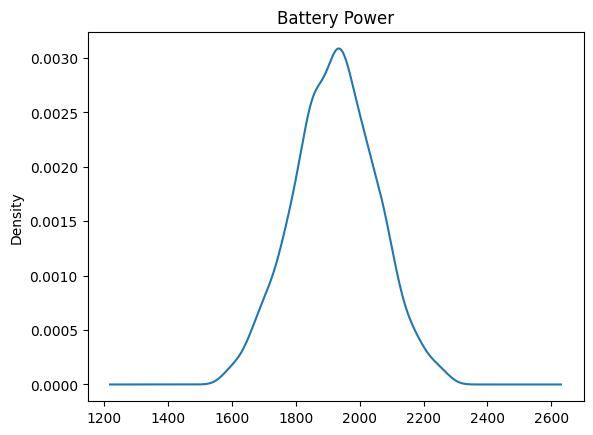

In [19]:
df_filtered['battery_power'].plot(kind='kde', title='Battery Power')

<Axes: title={'center': 'Battery Power'}, ylabel='Frequency'>

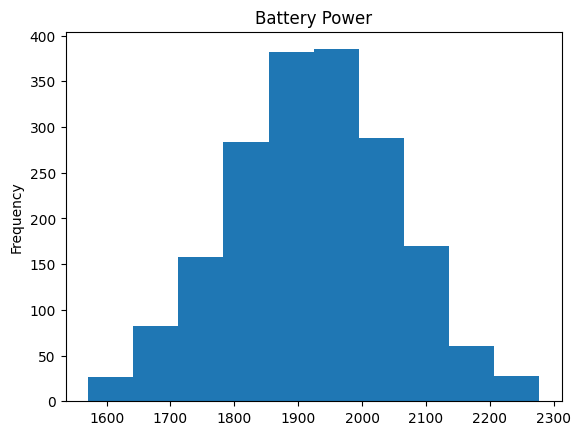

In [67]:
df_filtered['battery_power'].plot(kind='hist', title='Battery Power')

##### Descriptive Statistics of Battery

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 1922.4902555054323 | 1924.1016886240604 | 1908.9840881818127 | 16589.210664556544 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 128.79910971958054 | 2277.23806463553 | 1571.1202364293008 | 706.1178282062292 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 1833.8684847384684 | 2011.328071457394 | 2011.328071457394 | -0.014115969031549993 |

|      Kurtosis      |
|:------------------:|
| 2.782498785664197 |

#### Clock Speed

In [21]:
clockSpeedMean = sum(clockSpeedArray) / len(clockSpeedArray)
print(f"Mean: {clockSpeedMean}")
print(f"Median: {statistics.median(clockSpeedArray)}")
print(f"Mode: {statistics.mode(clockSpeedArray)}")

variance = 0
for clockSpeed in clockSpeedArray:
    variance += math.pow((clockSpeed - clockSpeedMean), 2)
variance /= len(clockSpeedArray)
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(clockSpeedArray)}")
print(f"Maximum: {max(clockSpeedArray)}")

skewness = 0
kurtosis = 0
for clockSpeed in clockSpeedArray:
    skewness += math.pow((clockSpeed - clockSpeedMean), 3)
    kurtosis += math.pow((clockSpeed - clockSpeedMean), 4)
skewness /= (len(clockSpeedArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(clockSpeedArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 1.1023954377531404
Median: 1.095997194578974
Mode: 0.9431593599626056
Variance: 0.08475475424549501
Standard Deviation: 0.29112669792634105
Minimum: 0.3076566370634803
Maximum: 1.917130586529546
Skewness: -0.00196054966607822
Kurtosis: 2.8051452286572873


<Axes: title={'center': 'Clock Speed'}, ylabel='Density'>

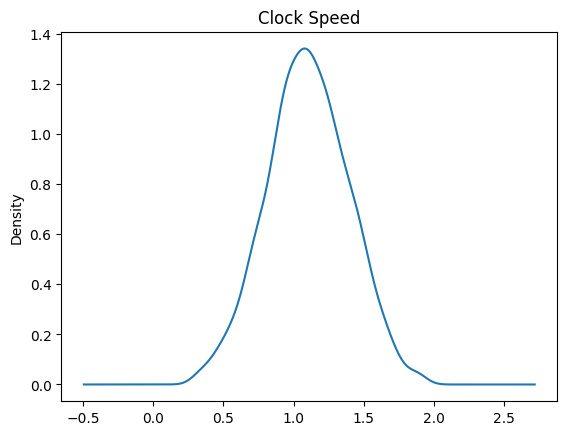

In [22]:
df_filtered['clock_speed'].plot(kind='kde', title="Clock Speed")

<Axes: title={'center': 'Clock Speed'}, ylabel='Frequency'>

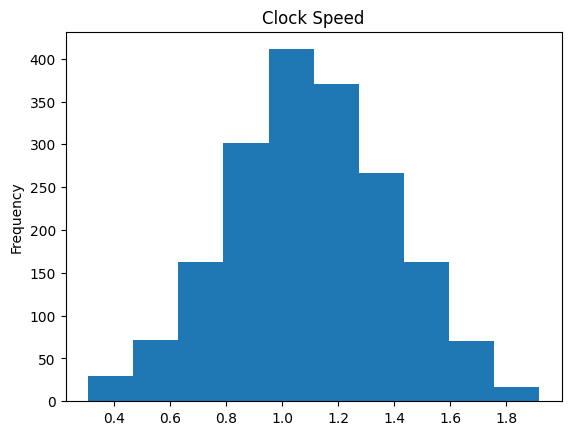

In [23]:
df_filtered['clock_speed'].plot(kind='hist', title="Clock Speed")

##### Descriptive Statistics of Clock Speed

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 1.1023954377531404 | 1.095997194578974 | 0.9431593599626056 | 0.08475475424549501 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 1.1023954377531404 | 1.095997194578974 | 0.9431593599626056 | 0.08475475424549501 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 0.902701814029262 | 1.3091332476167523 | 0.4064314335874903 | -0.00196054966607822 |

|      Kurtosis      |
|:------------------:|
| 2.8051452286572873 |

#### RAM

In [24]:
ramMean = sum(ramArray) / len(ramArray)
print(f"Mean: {ramMean}")
print(f"Median: {statistics.median(ramArray)}")
print(f"Mode: {statistics.mode(ramArray)}")

variance = 0
for ram in ramArray:
    variance += math.pow((ram - ramMean), 2)
variance /= len(ramArray) - 1
standardDeviationRAM = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviationRAM}")
print(f"Minimum: {min(ramArray)}")
print(f"Maximum: {max(ramArray)}")

skewness = 0
kurtosis = 0
for ram in ramArray:
    skewness += math.pow((ram - ramMean), 3)
    kurtosis += math.pow((ram - ramMean), 4)
skewness /= (len(ramArray) * math.pow(standardDeviationRAM, 3))
kurtosis /= (len(ramArray) * math.pow(standardDeviationRAM, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 6.056550228037378
Median: 6.016747940727095
Mode: 5.687524374104278
Variance: 3.7876561896244687
Standard Deviation: 1.946190173036661
Minimum: 0.7013605146135955
Maximum: 11.464016228695463
Skewness: 0.08139163775957751
Kurtosis: 2.6918786762110827


<Axes: title={'center': 'RAM'}, ylabel='Density'>

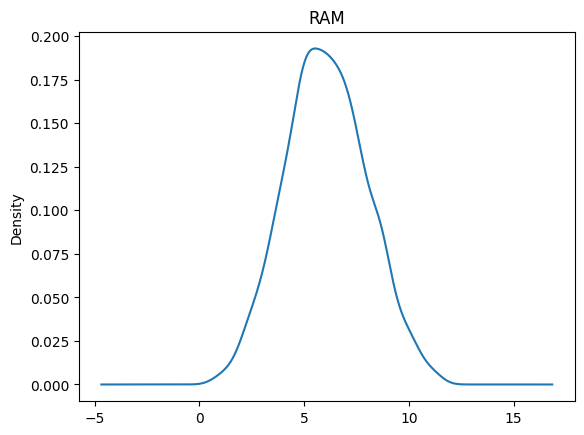

In [25]:
df_filtered['ram'].plot(kind='kde', title="RAM")

<Axes: title={'center': 'RAM'}, ylabel='Frequency'>

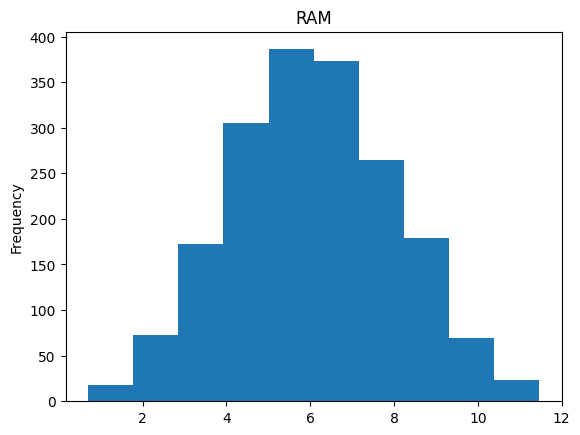

In [26]:
df_filtered['ram'].plot(kind='hist', title="RAM")

##### Descriptive Statistics of RAM

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 6.056550228037378 | 6.016747940727095 | 5.687524374104278 | 3.7876561896244687 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 1.946190173036661 | 11.464016228695463 | 0.7013605146135955 | 10.762655714081868 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 4.689465716165617 | 7.416067158135769 | 2.7266014419701525 | 0.08139163775957751 |

|      Kurtosis      |
|:------------------:|
| 2.6918786762110827 |

#### # of Cores

In [27]:
nCoresMean = sum(nCoresArray) / len(nCoresArray)
print(f"Mean: {nCoresMean}")
print(f"Median: {statistics.median(nCoresArray)}")
print(f"Mode: {statistics.mode(nCoresArray)}")

variance = 0
for nCores in nCoresArray:
    variance += math.pow((nCores - nCoresMean), 2)
variance /= len(nCoresArray) - 1
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(nCoresArray)}")
print(f"Maximum: {max(nCoresArray)}")

skewness = 0
kurtosis = 0
for nCores in nCoresArray:
    skewness += math.pow((nCores - nCoresMean), 3)
    kurtosis += math.pow((nCores - nCoresMean), 4)
skewness /= (len(nCoresArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(nCoresArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 12.034826239900227
Median: 12.058634408791011
Mode: 12.212481431064566
Variance: 4.683035193589151
Standard Deviation: 2.164032160941503
Minimum: 6.146934490670779
Maximum: 18.01761353995157
Skewness: -0.006169491922998766
Kurtosis: 2.646777379491348


<Axes: title={'center': 'Number of Cores'}, ylabel='Density'>

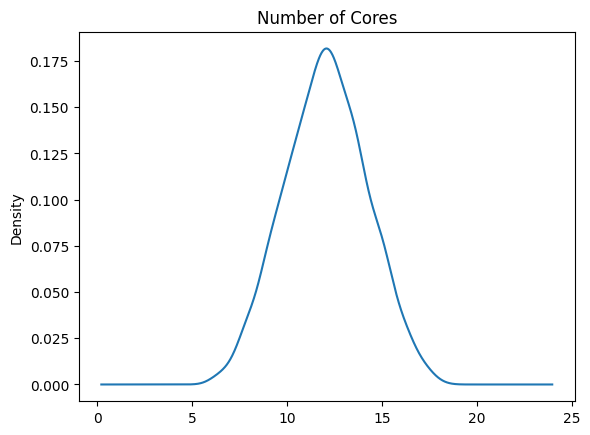

In [28]:
df_filtered['n_cores'].plot(kind='kde', title="Number of Cores")

<Axes: title={'center': 'Number of Cores'}, ylabel='Frequency'>

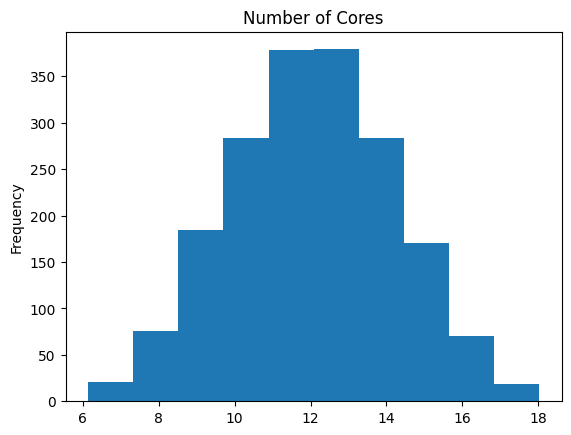

In [29]:
df_filtered['n_cores'].plot(kind='hist', title="Number of Cores")

##### Descriptive Statistics of Number of Cores


|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 12.034826239900227 | 12.058634408791011 | 12.212481431064566 | 4.683035193589151 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 2.164032160941503 | 18.01761353995157 | 6.146934490670779 | 11.87067904928079 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 10.5564876455369 | 13.543508639622672 | 2.987020994085773 | -0.006169491922998766 |

|      Kurtosis      |
|:------------------:|
| 2.646777379491348 |

#### Use Time

In [30]:
useTimeMean = sum(useTimeArray) / len(useTimeArray)
print(f"Mean: {useTimeMean}")
print(f"Median: {statistics.median(useTimeArray)}")
print(f"Mode: {statistics.mode(useTimeArray)}")

variance = 0
for useTime in useTimeArray:
    variance += math.pow((useTime - useTimeMean), 2)
variance /= len(useTimeArray) - 1
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(useTimeArray)}")
print(f"Maximum: {max(useTimeArray)}")

skewness = 0
kurtosis = 0
for useTime in useTimeArray:
    skewness += math.pow((useTime - useTimeMean), 3)
    kurtosis += math.pow((useTime - useTimeMean), 4)
skewness /= (len(useTimeArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(useTimeArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 8.031626171272963
Median: 8.013404959567467
Mode: 6.239332481634245
Variance: 1.3179332224534879
Standard Deviation: 1.1480127274788758
Minimum: 4.916292578755781
Maximum: 11.248337150073892
Skewness: -0.0872031177783351
Kurtosis: 2.7322882804428574


<Axes: title={'center': 'Use Time'}, ylabel='Density'>

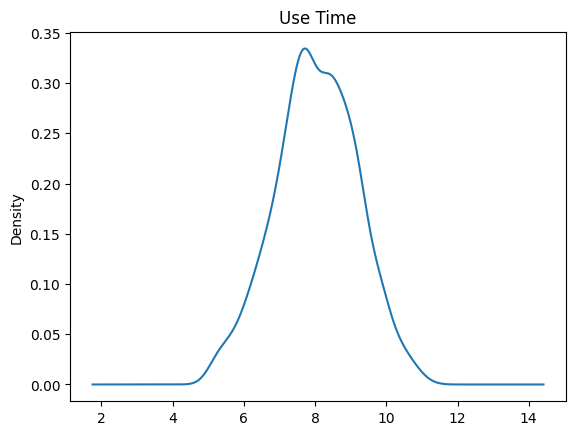

In [31]:
df_filtered['use_time'].plot(kind='kde', title="Use Time")

<Axes: title={'center': 'Use Time'}, ylabel='Frequency'>

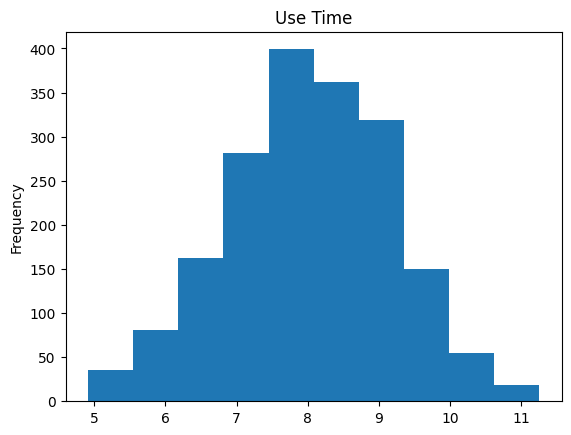

In [32]:
df_filtered['use_time'].plot(kind='hist', title="Use Time")

##### Descriptive Statistics of Use Time

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 8.031626171272963 | 8.013404959567467 | 6.239332481634245 | 1.3179332224534879 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 1.1480127274788758 | 11.248337150073892 | 4.916292578755781 | 6.332044571318111 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 7.278577914082928 | 8.872259429695514 | 1.5936815156125865 | -0.0872031177783351 |

|      Kurtosis      |
|:------------------:|
| 2.7322882804428574 |

#### Width

In [33]:
widthMean = sum(widthArray) / len(widthArray)
print(f"Mean: {widthMean}")
print(f"Median: {statistics.median(widthArray)}")
print(f"Mode: {statistics.mode(widthArray)}")

variance = 0
for width in widthArray:
    variance += math.pow((width - widthMean), 2)
variance /= len(widthArray) - 1
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(widthArray)}")
print(f"Maximum: {max(widthArray)}")

skewness = 0
kurtosis = 0
for width in widthArray:
    skewness += math.pow((width - widthMean), 3)
    kurtosis += math.pow((width - widthMean), 4)
skewness /= (len(widthArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(widthArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 728.6980069064415
Median: 728.6251580579568
Mode: 728.675566341065
Variance: 0.45183592521299676
Standard Deviation: 0.6721874182197973
Minimum: 726.8772065916139
Maximum: 730.595880936301
Skewness: 0.28485565011516883
Kurtosis: 2.74989722391763


<Axes: title={'center': 'Width (pixels)'}, ylabel='Density'>

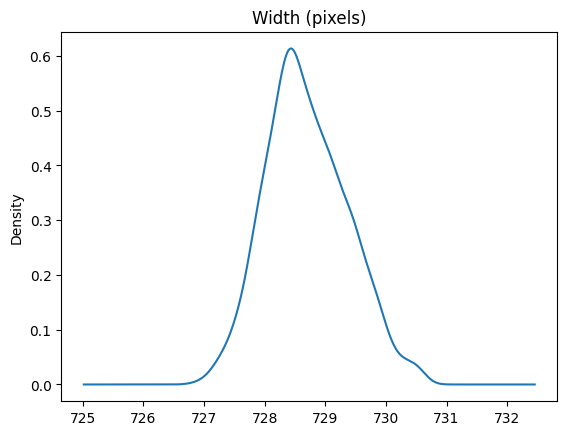

In [34]:
df_filtered['px_width'].plot(kind='kde', title="Width (pixels)")

<Axes: title={'center': 'Width (pixels)'}, ylabel='Frequency'>

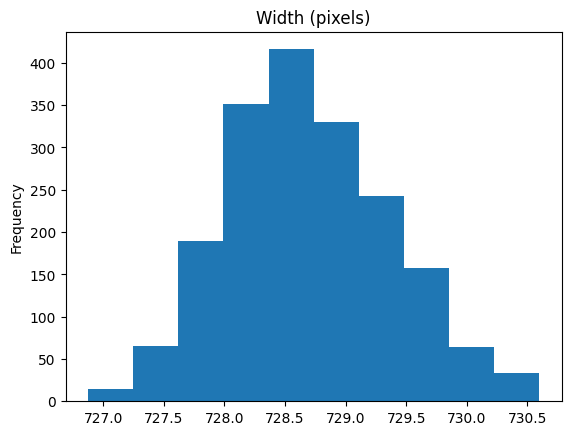

In [35]:
df_filtered['px_width'].plot(kind='hist', title="Width (pixels)")

##### Descriptive Statistics of Width

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 728.6980069064415 | 728.6251580579568 | 728.675566341065 | 0.45183592521299676 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 0.6721874182197973 | 730.595880936301 | 726.8772065916139 | 3.718674344687088 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
|  728.2284941364907 | 729.1774660487883 | 0.9489719122976794 | 0.28485565011516883 |

|      Kurtosis      |
|:------------------:|
| 2.74989722391763 |

#### Height

In [36]:
heightMean = sum(heightArray) / len(heightArray)
print(f"Mean: {heightMean}")
print(f"Median: {statistics.median(heightArray)}")
print(f"Mode: {statistics.mode(heightArray)}")

variance = 0
for height in heightArray:
    variance += math.pow((height - heightMean), 2)
variance /= len(heightArray) - 1
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(heightArray)}")
print(f"Maximum: {max(heightArray)}")

skewness = 0
kurtosis = 0
for height in heightArray:
    skewness += math.pow((height - heightMean), 3)
    kurtosis += math.pow((height - heightMean), 4)
skewness /= (len(heightArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(heightArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 1035.319513422439
Median: 1035.3724529197696
Mode: 1035.5268927511402
Variance: 0.44320283754233614
Standard Deviation: 0.6657348102227614
Minimum: 1033.481904408974
Maximum: 1037.0387781495165
Skewness: -0.2958329685165002
Kurtosis: 2.736035844493368


<Axes: title={'center': 'Height (pixels)'}, ylabel='Density'>

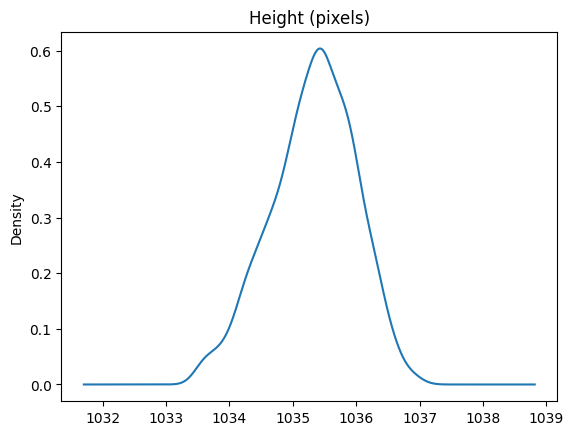

In [37]:
df_filtered['px_height'].plot(kind='kde', title="Height (pixels)")

<Axes: title={'center': 'Height (pixels)'}, ylabel='Frequency'>

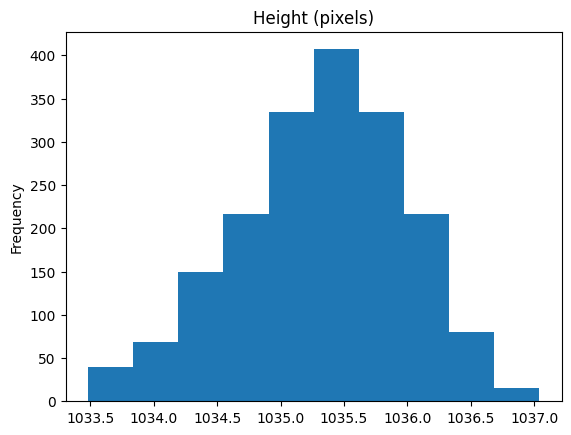

In [38]:
df_filtered['px_height'].plot(kind='hist', title="Height (pixels)")

##### Descriptive Statistics of Height (pixels)

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 1035.319513422439 | 1035.3724529197696 | 1035.5268927511402 | 0.44320283754233614 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 0.6657348102227614 | 1037.0387781495165 | 1033.481904408974 | 3.5568737405424145 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 1034.860955029187 | 1035.7929374790829 | 0.9319824498959406 | -0.2958329685165002 |

|      Kurtosis      |
|:------------------:|
| 2.736035844493368 |

#### Brands

brand
sumseng     631
oranye      445
largeyou    399
appa        389
Name: count, dtype: int64


<Axes: title={'center': 'Brands'}, xlabel='brand'>

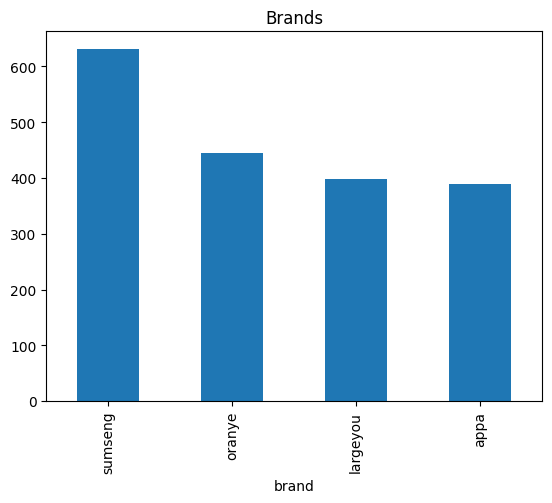

In [39]:
brands = df_filtered.brand.value_counts()
print(brands)
brands.plot(kind='bar', title="Brands")

##### Descriptive statistics of Brands

|     sumseng      |        oranye     |       largeyou     |         appa        |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 631 |  445 | 399 |  389 |

#### 5G Bandwidth

In [40]:
fivegMean = sum(fivegArray) / len(fivegArray)
print(f"Mean: {fivegMean}")
print(f"Median: {statistics.median(fivegArray)}")
print(f"Mode: {statistics.mode(fivegArray)}")

variance = 0
for fiveg in fivegArray:
    variance += math.pow((fiveg - fivegMean), 2)
variance /= len(fivegArray) - 1
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(fivegArray)}")
print(f"Maximum: {max(fivegArray)}")

skewness = 0
kurtosis = 0
for fiveg in fivegArray:
    skewness += math.pow((fiveg - fivegMean), 3)
    kurtosis += math.pow((fiveg - fivegMean), 4)
skewness /= (len(fivegArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(fivegArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 0.5067236559841642
Median: 0.5076084304299213
Mode: 0.8656227281593587
Variance: 0.08229667386440168
Standard Deviation: 0.2868739686071249
Minimum: 0.0001472366748813
Maximum: 0.9992159847023164
Skewness: 0.0005957694355341141
Kurtosis: 1.8075386635892734


<Axes: title={'center': '5G Bandwidth'}, ylabel='Density'>

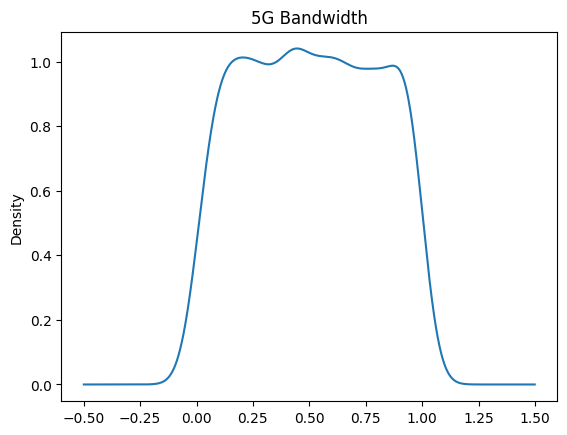

In [41]:
df_filtered['5g'].plot(kind='kde', title="5G Bandwidth")

<Axes: title={'center': '5G Bandwidth'}, ylabel='Frequency'>

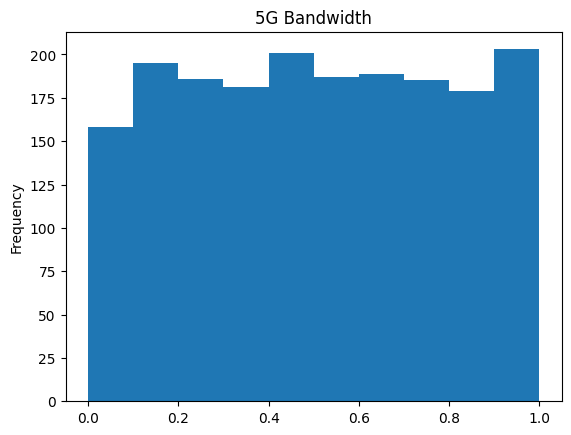

In [42]:
df_filtered['5g'].plot(kind='hist', title="5G Bandwidth")

##### Descriptive Statistics of 5G Bandwith

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 0.5067236559841642 | 0.5076084304299213 | 0.8656227281593587 | 0.08229667386440168 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 0.2868739686071249 | 0.9992159847023164 | 0.0001472366748813 | 0.9990687480274352 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 0.2557624819074696 |  0.7568483317625406 |0.501085849855071  | 0.0005957694355341141 |

|      Kurtosis      |
|:------------------:|
| 1.8075386635892734 |

#### Grades

grade
A    655
B    633
C    576
Name: count, dtype: int64


<Axes: title={'center': 'Grades'}, xlabel='grade'>

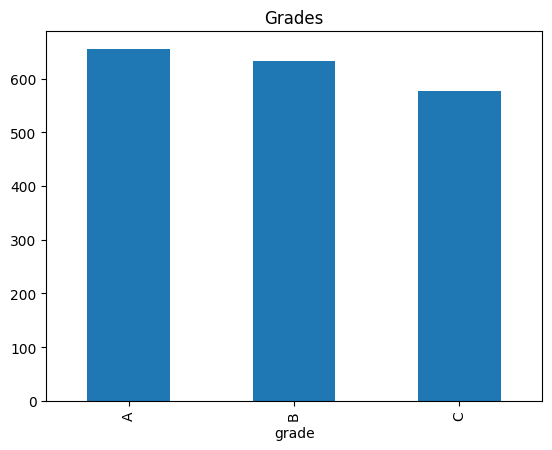

In [43]:
grades = df_filtered.grade.value_counts()
print(grades)
grades.plot(kind='bar', title="Grades")

Descriptive Statistics of Grades

|        A       |       B      |       C       |
|:-----------------:|:-----------------:|:-----------------:|
| 655 | 633 | 576 |

#### Price

In [44]:
priceMean = sum(priceArray) / len(priceArray)
print(f"Mean: {priceMean}")
print(f"Median: {statistics.median(priceArray)}")
print(f"Mode: {statistics.mode(priceArray)}")

variance = 0
for price in priceArray:
    variance += math.pow((price - priceMean), 2)
variance /= len(priceArray) - 1
standardDeviation = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {standardDeviation}")
print(f"Minimum: {min(priceArray)}")
print(f"Maximum: {max(priceArray)}")

skewness = 0
kurtosis = 0
for price in priceArray:
    skewness += math.pow((price - priceMean), 3)
    kurtosis += math.pow((price - priceMean), 4)
skewness /= (len(priceArray) * math.pow(standardDeviation, 3))
kurtosis /= (len(priceArray) * math.pow(standardDeviation, 4))

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 7977.9220422925155
Median: 7995.489727204867
Mode: 8106.876568456718
Variance: 3703886.4783282317
Standard Deviation: 1924.5483829533182
Minimum: 2765.9466625979912
Maximum: 13075.76979105915
Skewness: 0.004432666269902849
Kurtosis: 2.757226869809606


In [77]:
print(max(priceArray)-min(priceArray))

10309.82312846116


<Axes: title={'center': 'Price'}, ylabel='Density'>

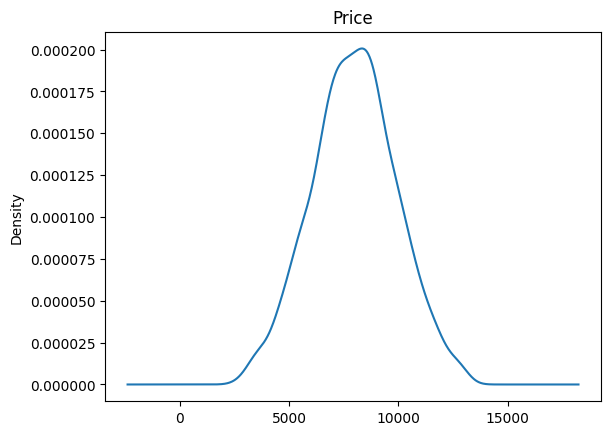

In [45]:
df_filtered['price'].plot(kind='kde', title="Price")

<Axes: title={'center': 'Price'}, ylabel='Frequency'>

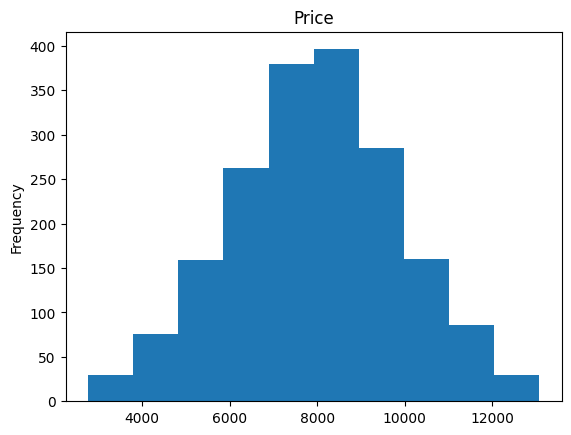

In [46]:
df_filtered['price'].plot(kind='hist', title="Price")

##### Descriptive Statistics of Price

|        Mean       |       Median      |        Mode       |      Variance     |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| 7977.9220422925155 | 7995.489727204867 | 8106.876568456718 | 3703886.4783282317 |

|         SD        |        Max        |        Min       |       Range       |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|
| 1924.5483829533182 | 13075.76979105915 | 2765.9466625979912 | 10309.82312846116 |

|        Q1        |         Q3        |         IQR        |       Skewness      |
|:----------------:|:-----------------:|:------------------:|:-------------------:|
| 6650.555712238094 | 9250.347193985735 | 2599.7914817476412 | 0.004432666269902849 |

|      Kurtosis      |
|:------------------:|
| 2.757226869809606 |

 =======================================================================================================================================================================================================

|  Attributes  |        Mean        | Median             | Mode               |       Variance     | Standard Deviation | Max               | Min                | Range | Q1                | Q3                 | IQR                | Skewness             | Kurtosis          |
|:------------:|:------------------:|--------------------|--------------------|--------------------|--------------------|-------------------|--------------------|-------|-------------------|--------------------|--------------------|----------------------|-------------------|
| Battery      | 1922.4902555054323 | 1924.1016886240604 | 1908.9840881818127 | 16589.210664556544 | 128.79910971958054 | 2277.23806463553 | 1571.1202364293008 | 706.1178282062292 | 1833.8684847384684 | 2011.328071457394 | 2011.328071457394 | -0.014115969031549993 | 2.782498785664197 |
| Clock Speed  | 1.1023954377531404 | 1.095997194578974 | 0.9431593599626056 | 0.08475475424549501 | 1.1023954377531404 | 1.095997194578974 | 0.9431593599626056 | 0.08475475424549501 | 1.1023954377531404 | 1.095997194578974 | 0.9431593599626056 | 0.08475475424549501 | 2.8051452286572873 |
| RAM          | 6.056550228037378 | 6.016747940727095 | 5.687524374104278 | 3.7876561896244687 | 1.946190173036661 | 11.464016228695463 | 0.7013605146135955 | 10.762655714081868 | 4.689465716165617 | 7.416067158135769 | 2.7266014419701525 | 0.08139163775957751 | 2.6918786762110827 |
| # of Cores   | 12.034826239900227 | 12.058634408791011 | 12.212481431064566 | 4.683035193589151 | 2.164032160941503 | 18.01761353995157 | 6.146934490670779 | 11.87067904928079 | 10.5564876455369 | 13.543508639622672 | 2.987020994085773 | -0.006169491922998766 | 2.646777379491348 |
| Use Time     | 8.031626171272963 | 8.013404959567467 | 6.239332481634245 | 1.3179332224534879 | 1.1480127274788758 | 11.248337150073892 | 4.916292578755781 | 6.332044571318111 | 7.278577914082928 | 8.872259429695514 | 1.5936815156125865 | -0.0872031177783351 | 2.7322882804428574 |
| Width        | 728.6980069064415 | 728.6251580579568 | 728.675566341065 | 0.45183592521299676 | 0.6721874182197973 | 730.595880936301 | 726.8772065916139 | 3.718674344687088 |  728.2284941364907 | 729.1774660487883 | 0.9489719122976794 | 0.28485565011516883 | 2.74989722391763 |
| Height       | 1035.319513422439 | 1035.3724529197696 | 1035.5268927511402 | 0.44320283754233614 | 0.6657348102227614 | 1037.0387781495165 | 1033.481904408974 | 3.5568737405424145 | 1034.860955029187 | 1035.7929374790829 | 0.9319824498959406 | -0.2958329685165002 | 2.736035844493368 |
| Dimension    |                    |                    |                    |                    |                    |                   |                    |       |                   |                    |                    |                      |                   |
| 5G Bandwidth | 0.5067236559841642 | 0.5076084304299213 | 0.8656227281593587 | 0.08229667386440168 | 0.2868739686071249 | 0.9992159847023164 | 0.0001472366748813 | 0.9990687480274352 | 0.2557624819074696 |  0.7568483317625406 |0.501085849855071  | 0.0005957694355341141 | 1.8075386635892734 |
| Price        | 7977.9220422925155 | 7995.489727204867 | 8106.876568456718 | 3703886.4783282317 | 1924.5483829533182 | 13075.76979105915 | 2765.9466625979912 | 10309.82312846116 | 6650.555712238094 | 9250.347193985735 | 2599.7914817476412 | 0.004432666269902849 | 2.757226869809606 |

### Normality of Distribution

There are two parameters that we can use to measure the normality of a distribution.\
\
The first parameter is skewness. Skewness is defined as a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value s of a distribution can be interpreted as such
- s < 0 (negative skew)\
The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.
- s = 0\
The mass of the distribution is perfectly balanced on both side with the value of the mean being equal to that of the median and mode.
- s > 0 (positive skew)\
The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.


The second parameter is kurtosis. Kurtosis is defined as a statistical measure that quantifies the shape of a probability distribution. It provides information about the tails and peakedness of the distribution compared to a normal distribution. The kurtosis value k of a distribution can be interpreted as such
- k < 3 (leptokurtic)\
A distribution with leptokurtic kurtosis has heavier tails and a sharper peak than the normal distribution. It has a positive kurtosis value, indicating that it has more extreme outliers than a normal distribution. This type of distribution is often associated with higher peakedness and a greater probability of extreme values.
- k = 3 (mesokurtic)\
A distribution with mesokurtic kurtosis has a similar peak and tail shape as the normal distribution. It has a kurtosis value of around 3, indicating that its tails are neither too heavy nor too light compared to a normal distribution.
- k > 3 (platykurtic)\
A distribution with platykurtic kurtosis has lighter tails and a flatter peak than the normal distribution. It has a negative kurtosis value, indicating that it has fewer extreme outliers than a normal distribution. This type of distribution is often associated with less peakedness and a lower probability of extreme values.

A distribution is said to be a perfect normal distribution if it fulfills s = 0 AND k = 3. However, there are no fixed definition in determining the normality of a certain distribution as the p-value must be defined arbitrarily by the user. In this case, let us assume p = 0.05.

In [47]:
#D'Agostino and Pearson's test with scipy.stats.normaltest
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#id2

#H0 : Distribution is normal
#H1 : Distribution is not normal
p = 0.05

res = stats.normaltest(df_filtered['battery_power'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"{res[1]} < {p}")
    print(f"Distribution of battery_power is not a normal distribution")
else: #Reject H1, accept H0
    print(f"{res[1]} > {p}")
    print(f"Distribution of battery_power is a normal distribution")

res = stats.normaltest(df_filtered['clock_speed'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of clock_speed is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of clock_speed is a normal distribution")

res = stats.normaltest(df_filtered['ram'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of ram is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of ram is a normal distribution")

res = stats.normaltest(df_filtered['n_cores'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of n_cores is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of n_cores is a normal distribution")

res = stats.normaltest(df_filtered['use_time'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of use_time is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of use_time is a normal distribution")
    
res = stats.normaltest(df_filtered['px_width'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of px_width is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of px_width is a normal distribution")

res = stats.normaltest(df_filtered['px_height'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of px_height is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of px_height is a normal distribution")

res = stats.normaltest(df_filtered['5g'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of 5g is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of 5g is a normal distribution")

res = stats.normaltest(df_filtered['price'])
if(res[1] < 0.05): #Reject H0, accept H1
    print(f"\n{res[1]} < {p}")
    print(f"Distribution of price is not a normal distribution")
else: #Reject H1, accept H0
    print(f"\n{res[1]} > {p}")
    print(f"Distribution of price is a normal distribution")

0.11938518468695045 > 0.05
Distribution of battery_power is a normal distribution

0.18741468292084068 > 0.05
Distribution of clock_speed is a normal distribution

0.002763614361358552 < 0.05
Distribution of ram is not a normal distribution

0.0010741848503050858 < 0.05
Distribution of n_cores is not a normal distribution

0.009732500612305274 < 0.05
Distribution of use_time is not a normal distribution

2.5862848441574504e-07 < 0.05
Distribution of px_width is not a normal distribution

6.843596775926192e-08 < 0.05
Distribution of px_height is not a normal distribution

5.753298265781992e-299 < 0.05
Distribution of 5g is not a normal distribution

0.06556003373400017 > 0.05
Distribution of price is a normal distribution


## Hipotesis 1 Sampel
- Testimoni dari pengguna banyak yang menyatakan bahwa kapasitas baterai yang digunakan kurang dari sewajarnya. Periksa apakah battery_power memiliki rata-rata di atas 1800?

In [48]:
# Hypothesis
# H0: u = 1800
# H1: u > 1800

# Significance level
alpha = 0.05

# Proving u = u0 with unknown standard deviation
# Use t-distribution

# Given data
s = standardDeviationBattery
average = batteryMean
n = df_filtered.shape[0]
u0 = 1800

# Calculate the t-value
t_value = (average - u0) / (s / math.sqrt(n))

# Calculate the one-tailed p-value
p_value = 1 - stats.t.cdf(t_value, df=n-1)

# Determine the critical value for the one-tailed test
critical_value = stats.t.ppf(1 - alpha, df=n-1)

# Print results
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")
print(f"Critical value: {critical_value}")

# Compare t-value with critical value to make a decision
if t_value > critical_value:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Battery power memiliki rata-rata di atas 1800")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Battery power tidak terbukti memiliki rata-rata di atas 1800")

t-value: 41.059308737191685
p-value: 0.0
Critical value: 1.645671947805635

0.0 < 0.05
Reject H0
Battery power memiliki rata-rata di atas 1800


- Standar RAM yang dimiliki oleh suatu smartphone sekarang adalah 8 GB. Periksalah apakah rata-rata ram smartphone pada dataset adalah 8 GB?

In [49]:
# Hypothesis
# H0: u = 8
# H1: u != 8

# Significance level
alpha = 0.05

# Proving u = u0 with unknown standard deviation
# Use t-distribution

# Given data
s = standardDeviationRAM
average = ramMean
n = df_filtered.shape[0]
u0 = 8

# Calculate the t-value
t_value = (average - u0) / (s / math.sqrt(n))

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=n-1))

# Determine the critical value for the two-tailed test
critical_value_low = stats.t.ppf(alpha/2, df=n-1) #0.025
critical_value_high = stats.t.ppf(1 - alpha/2, df=n-1) #0.975

# Print results
print(f"t-value: {t_value}")
print(f"P-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare t-value with critical values to make a decision
if t_value < critical_value_low or t_value > critical_value_high:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Rata-rata RAM berbeda dari 8 GB")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Tidak ada bukti bahwa rata-rata RAM berbeda dari 8 GB")

t-value: -43.113273537282105
P-value: 0.0
Critical value (low): -1.9612381589875671
Critical value (high): 1.9612381589875667

0.0 < 0.05
Reject H0
Rata-rata RAM berbeda dari 8 GB


- Periksa apakah 250 data pertama pada dataset memiliki rata-rata kecepatan clocking (clock_speed) tidak sama dengan 1!

In [50]:
# Hypothesis
# H0: u = 1
# H1: u != 1

# Significance level
alpha = 0.05

# Proving u = u0 with unknown standard deviation
# Use t-distribution

# Get and sort first 250 datas
df_250 = df_filtered[:250]
array_250 = df_250.to_numpy()
array_clock_250 = []

for data in array_250:
    array_clock_250.append(data[2])

array_clock_250.sort()

# Count mean and standard deviation from sample set
mean_clock_250 = sum(array_clock_250) / len(array_clock_250)

variance = 0
for clock in array_clock_250:
    variance += math.pow((clock - mean_clock_250), 2)
variance /= len(array_clock_250) - 1
standardDeviation = math.sqrt(variance)

# Given data
s = standardDeviation
average = mean_clock_250
n = 250
u0 = 1

# Calculate the t-value
t_value = (average - u0) / (s / math.sqrt(n))

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=n-1))

# Determine the critical value for the two-tailed test
critical_value_low = stats.t.ppf(alpha/2, df=n-1) #0.025
critical_value_high = stats.t.ppf(1 - alpha/2, df=n-1) #0.975

# Print results
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare t-value with critical values to make a decision
if t_value < critical_value_low or t_value > critical_value_high:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Rata-rata clock speed berbeda dari 1")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Tidak ada bukti bahwa rata-rata clock speed berbeda dari 1")

t-value: 4.6662197294407575
p-value: 5.013471710002548e-06
Critical value (low): -1.9695368676395828
Critical value (high): 1.9695368676395824

5.013471710002548e-06 < 0.05
Reject H0
Rata-rata clock speed berbeda dari 1


- Periksalah apakah data smartphone dengan merek “appa” yang memiliki rata-rata waktu penggunaan (use_time) lebih dari 8.5 tidak sama dengan 35% dari data keseluruhan?

In [51]:
# Hypothesis
# H1: p = 0.35
# H2: p != 0.35

# Significance level
alpha = 0.05

# Proving p = p0 with large N
# Use binomial-normal approach with z-distribution

# Get and sort data
use_time_mask = df_filtered['use_time'] > 8.5
brand_mask = df_filtered['brand'] == "appa"

filter_mask = use_time_mask & brand_mask
data = df_filtered[filter_mask]

# Given data
n = df_filtered.shape[0]
p0 = 0.35
q0 = 1 - p0
p = len(data) / n

# Calculate the z-value
z_value = (p - p0) / (math.sqrt(p0 * q0 / n))

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_value)))

# Determine the critical value for the two-tailed test
critical_value_low = stats.norm.ppf(alpha/2) #0.025
critical_value_high = stats.norm.ppf(1 - alpha/2) #0.975

# Print results
print(f"z-value: {z_value}")
print(f"p-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare t-value with critical values to make a decision
if z_value < critical_value_low or z_value > critical_value_high:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Smartphone dengan merek “appa” yang memiliki use time lebih dari 8.5 tidak membentuk 35 persen dari data keseluruhan")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Smartphone dengan merek “appa” yang memiliki use time lebih dari 8.5 membentuk 35 persen dari data keseluruhan")

z-value: -25.65955701300888
p-value: 0.0
Critical value (low): -1.9599639845400545
Critical value (high): 1.959963984540054

0.0 < 0.05
Reject H0
Smartphone dengan merek “appa” yang memiliki use time lebih dari 8.5 tidak membentuk 35 persen dari data keseluruhan


## Hipotesis 2 Sampel
Markuis berasumsi setengah bagian pertama dataset adalah smartphone generasi sebelumnya dan setengah bagian terakhir adalah smartphone generasi sekarang.

In [52]:
# Split dataframe in half
length = df_filtered.shape[0]
dfOldGen = df_filtered[:932]
dfNewGen = df_filtered[932:]

In [53]:
# Insert and sort attribute datas for old gen
oldGen = dfOldGen.to_numpy()

batteryPowerOld = []
clockSpeedOld = []
ramOld = []
nCoresOld = []
useTimeOld = []
widthOld = []
heightOld = []
brandOld = []
bandwidthOld = []
gradeOld = []
priceOld = []

for data in oldGen:
    batteryPowerOld.append(data[1])
    clockSpeedOld.append(data[2])
    ramOld.append(data[3])
    nCoresOld.append(data[4])
    useTimeOld.append(data[5])
    widthOld.append(data[6])
    heightOld.append(data[7])
    brandOld.append(data[8])
    bandwidthOld.append(data[9])
    gradeOld.append(data[10])
    priceOld.append(data[11])

batteryPowerOld.sort()
clockSpeedOld.sort()
ramOld.sort()
nCoresOld.sort()
useTimeOld.sort()
widthOld.sort()
heightOld.sort()
brandOld.sort()
bandwidthOld.sort()
gradeOld.sort()
priceOld.sort()

In [54]:
# Insert and sort attribute datas for new gen
newGen = dfNewGen.to_numpy()

batteryPowerNew = []
clockSpeedNew = []
ramNew = []
nCoresNew = []
useTimeNew = []
widthNew = []
heightNew = []
brandNew = []
bandwidthNew = []
gradeNew = []
priceNew = []

for data in newGen:
    batteryPowerNew.append(data[1])
    clockSpeedNew.append(data[2])
    ramNew.append(data[3])
    nCoresNew.append(data[4])
    useTimeNew.append(data[5])
    widthNew.append(data[6])
    heightNew.append(data[7])
    brandNew.append(data[8])
    bandwidthNew.append(data[9])
    gradeNew.append(data[10])
    priceNew.append(data[11])

batteryPowerNew.sort()
clockSpeedNew.sort()
ramNew.sort()
nCoresNew.sort()
useTimeNew.sort()
widthNew.sort()
heightNew.sort()
brandNew.sort()
bandwidthNew.sort()
gradeNew.sort()
priceNew.sort()


- Periksa apakah rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang?

In [55]:
# Calculate mean and standard deviation for old gen
oldCoreMean = sum(nCoresOld) / len(nCoresOld)

varianceOldCore = 0
for oldCore in nCoresOld:
    varianceOldCore += math.pow((oldCore - oldCoreMean), 2)
varianceOldCore /= len(nCoresOld) - 1
standardDeviationOldCore = math.sqrt(varianceOldCore)

In [56]:
# Calculate mean and standard deviation for new gen
newCoreMean = sum(nCoresNew) / len(nCoresNew)

varianceNewCore = 0
for newCore in nCoresNew:
    varianceNewCore += math.pow((newCore - newCoreMean), 2)
varianceNewCore /= len(nCoresNew) - 1
standardDeviationNewCore = math.sqrt(varianceNewCore)

In [57]:
# Hypothesis
# H0: u1 - u2 = 0
# H1: u1 - u2 != 0

# Significance level
alpha = 0.05

# Proving u1 - u2 = d0 with unknown uniform standard deviation
# Use t-distribution

# Given data
s1 = standardDeviationOldCore
s2 = standardDeviationNewCore
n1 = len(nCoresOld)
n2 = len(nCoresNew)
u1 = oldCoreMean
u2 = newCoreMean
d0 = 0 #u1 = u2

# Calculate sp
sp2 = ((n1 - 1) * math.pow(s1, 2) + (n2 - 1) * math.pow(s2, 2)) / (n1 + n2 - 2)
sp = math.sqrt(sp2)

# Calculate t-value
t_value = ((u1 - u2) - d0) / (sp * math.sqrt(1/n1 + 1/n2))

# Calculate degree of freedom
v = n1 + n2 - 2

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=v))

# Determine the critical value for the two-tailed test
critical_value_low = stats.t.ppf(alpha/2, df=v) #0.025
critical_value_high = stats.t.ppf(1 - alpha/2, df=v) #0.975

# Print results
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare t-value with critical values to make a decision
if t_value < critical_value_low or t_value > critical_value_high:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Rata-rata jumlah core (n_cores) smartphone generasi sebelumnya berbeda dengan jumlah core smartphone generasi sekarang")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang")


t-value: 0.717259839579148
p-value: 0.4733037480408986
Critical value (low): -1.9612388437291868
Critical value (high): 1.9612388437291863

0.4733037480408986 > 0.05
Fail to reject H0
Rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang


- Bagaimana dengan harga smartphone, apakah harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya?

In [58]:
# Calculate mean and standard deviation for old gen
oldPriceMean = sum(priceOld) / len(priceOld)

varianceOldPrice = 0
for oldPrice in priceOld:
    varianceOldPrice += math.pow((oldPrice - oldPriceMean), 2)
varianceOldPrice /= len(priceOld) - 1
standardDeviationOldPrice = math.sqrt(varianceOldPrice)

In [59]:
# Calculate mean and standard deviation for new gen
newPriceMean = sum(priceNew) / len(priceNew)

varianceNewPrice = 0
for newPrice in priceNew:
    varianceNewPrice += math.pow((newPrice - newPriceMean), 2)
varianceNewPrice /= len(priceNew) - 1
standardDeviationNewPrice = math.sqrt(varianceNewPrice)

In [60]:
# Hypothesis
# H0: u1 - u2 = 100
# H1: u1 - u2 != 100

# Significance level
alpha = 0.05

# Proving u1 - u2 = d0 with unknown uniform standard deviation
# Use t-distribution
# Given data
s1 = standardDeviationNewPrice
s2 = standardDeviationOldPrice
n1 = len(priceNew)
n2 = len(priceOld)
u1 = newPriceMean
u2 = oldPriceMean
d0 = 100

# Calculate sp
sp2 = ((n1 - 1) * math.pow(s1, 2) + (n2 - 1) * math.pow(s2, 2)) / (n1 + n2 - 2)
sp = math.sqrt(sp2)

# Calculate t-value
t_value = ((u1 - u2) - d0) / (sp * math.sqrt(1/n1 + 1/n2))

# Calculate degree of freedom
v = n1 + n2 - 2

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=v))

# Determine the critical value for the two-tailed test
critical_value_low = stats.t.ppf(alpha/2, df=v) #0.025
critical_value_high = stats.t.ppf(1 - alpha/2, df=v) #0.975

# Print results
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare t-value with critical values to make a decision
if t_value < critical_value_low or t_value > critical_value_high:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Harga smartphone generasi sekarang tidak lebih mahal 100 dari generasi sebelumnya")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya")

t-value: -1.241203051875266
p-value: 0.2146870915011112
Critical value (low): -1.9612388437291868
Critical value (high): 1.9612388437291863

0.2146870915011112 > 0.05
Fail to reject H0
Harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya


- Apakah variansi dari tinggi smartphone (px_height) sama pada kedua generasi?

In [61]:
# Calculate mean and standard deviation for old gen
oldHeightMean = sum(heightOld) / len(heightOld)

varianceOldHeight = 0
for oldHeight in heightOld:
    varianceOldHeight += math.pow((oldHeight - oldHeightMean), 2)
varianceOldHeight /= len(heightOld) - 1
standardDeviationOldHeight = math.sqrt(varianceOldHeight)

In [62]:
# Calculate mean and standard deviation for old gen
newHeightMean = sum(heightNew) / len(heightNew)

varianceNewHeight = 0
for newHeight in heightNew:
    varianceNewHeight += math.pow((newHeight - newHeightMean), 2)
varianceNewHeight /= len(heightNew) - 1
standardDeviationNewHeight = math.sqrt(varianceNewHeight)

In [63]:
# Hypothesis
# H0: σ1^2 = σ2^2
# H1: σ1^2 != σ2^2

# Significance level
alpha = 0.05

# Proving σ1^2 = σ2^2
# Use f-distribution

# Given data
s1 = standardDeviationOldHeight
s2 = standardDeviationNewHeight

# Calculate f-value
f_value = math.pow(s1, 2) / math.pow(s2, 2)

# Calculate degree of freedom
v1 =  len(heightOld) - 1
v2 = len(heightNew) - 1

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.f.cdf(abs(f_value), v1, v2))

# Determine the critical value for the two-tailed test
critical_value_low = stats.f.ppf(alpha/2, v1, v2) #0.025
critical_value_high = stats.f.ppf(1 - alpha/2, v1, v2) #0.975

# Print results
print(f"f-value: {f_value}")
print(f"p-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare f-value with critical values to make a decision
if f_value < critical_value_low or f_value > critical_value_high:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Variansi dari tinggi smartphone (px_height) berbeda pada kedua generasi")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Variansi dari tinggi smartphone (px_height) sama pada kedua generasi")

f-value: 1.0440952336246958
p-value: 0.5104666797349298
Critical value (low): 0.8793703356451548
Critical value (high): 1.1371773182072882

0.5104666797349298 > 0.05
Fail to reject H0
Variansi dari tinggi smartphone (px_height) sama pada kedua generasi


- Apakah proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang?

In [64]:
# Calculate mean and standard deviation for old gen
battery_old_mask = dfOldGen['battery_power'] > 2030

dataOld = dfOldGen[battery_old_mask]

In [65]:
battery_new_mask = dfNewGen['battery_power'] > 2030

dataNew = dfNewGen[battery_new_mask]

In [66]:
# Hypothesis
# H0: p1 = p2 -> p1 - p2 = 0
# H1: p1 > p2 -> p1 - p2 > 0

# Significance level
alpha = 0.05

# Proving p1 - p2 = 0
# Use z-distribution

# Given data
x1 = len(dataOld)
x2 = len(dataNew)
n1 = len(batteryPowerOld)
n2 = len(batteryPowerNew)

# Calculate each proportion
p1 = x1 / n1
p2 = x2 / n2

# Calculate total proportion
p = (x1 + x2) / (n1 + n2)
q = 1 - p

# Calculate z-value
z_value = (p1 - p2) / math.sqrt(p * q * (1/n1 + 1/n2))

# Calculate the one-tailed p-value
p_value = 1 - stats.norm.cdf(z_value)

# Determine the critical value for the two-tailed test
critical_value = stats.norm.ppf(alpha)

# Print results
print(f"z-value: {z_value}")
print(f"p-value: {p_value}")
print(f"Critical value: {critical_value}")

# Compare z-value with critical values to make a decision
if z_value < critical_value:
    # Check p-value to make sure
    print(f"\n{p_value} < {alpha}")
    print("Reject H0")
    print("Proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi\nsebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari\n2030 pada smartphone generasi sekarang")
else:
    print(f"\n{p_value} > {alpha}")
    print("Fail to reject H0")
    print("Proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi\nsebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari\n2030 pada smartphone generasi sekarang")

z-value: -0.6912718874697193
p-value: 0.755302652467811
Critical value: -1.6448536269514729

0.755302652467811 > 0.05
Fail to reject H0
Proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi
sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari
2030 pada smartphone generasi sekarang
